In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from WindPy import w
%matplotlib inline

In [108]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

## 获取起始日期

In [109]:
today = datetime.datetime.today()

In [110]:
today.strftime('%Y-%m-%d')

'2019-03-04'

In [111]:
start_date = today - datetime.timedelta(365) # 最近1年

In [112]:
start_date.strftime('%Y-%m-%d')

'2018-03-04'

## 获取数据

In [113]:
df = pd.read_excel(u'../data/资产与宏观变量.xlsx')

In [114]:
df

,Variables,Name,Assets
0,USDCNH.FX,美元兑人民币,000300.SH
1,S0059749,10Y国债收益率,000905.SH
2,M0017142,3M SHIBOR,881001.WI
3,S0059766,AA级企业债收益率,CBA00602.CS
4,G1122652,股票波动率,CBA02002.CS
5,SPX.GI,标普500,AU9999.SGE
6,G0000891,10Y美债收益率,HSI.HI
7,G8324466,A股市盈率,NaN


In [115]:
var2name = {k: v for k, v in zip(df['Variables'], df['Name'])}

In [116]:
data = w.wsd(df['Assets'].tolist()[:7], 'close', start_date, today)

In [117]:
price = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [118]:
price.head()

,000300.SH,000905.SH,881001.WI,CBA00602.CS,CBA02002.CS,AU9999.SGE,HSI.HI
2018-03-05,4018.0970,6064.0983,4403.0184,113.2388,77.7921,272.09,29886.39
2018-03-06,4066.5647,6145.5768,4454.8802,113.2482,77.7961,271.15,30510.73
2018-03-07,4036.6536,6086.4874,4423.8789,113.3020,77.8124,272.30,30196.92
2018-03-08,4077.6001,6131.5142,4461.4807,113.3278,77.8175,272.21,30654.52
2018-03-09,4108.8652,6206.9754,4510.6772,113.3629,77.7972,270.60,30996.21


In [119]:
price.tail()

,000300.SH,000905.SH,881001.WI,CBA00602.CS,CBA02002.CS,AU9999.SGE,HSI.HI
2019-02-26,3684.6935,5038.5435,3936.8848,118.2438,79.9787,288.00,28772.06
2019-02-27,3678.3921,5017.8842,3929.2381,118.3660,79.9676,287.89,28757.44
2019-02-28,3669.3703,5025.2913,3928.2468,118.3048,79.9399,286.02,28633.18
2019-03-01,3749.7143,5067.2250,3988.7126,118.2246,79.8976,284.49,28812.17
2019-03-04,3749.7143,5067.2250,3988.7126,118.2246,79.8976,284.49,28812.17


In [120]:
market_variables = [x for x in df['Variables'] if str(x).find('.') != -1]
economic_variables = [x for x in df['Variables'] if str(x).find('.') == -1 and str(x) != 'nan']

In [121]:
market_variables

[u'USDCNH.FX', u'SPX.GI']

In [122]:
economic_variables

[u'S0059749', u'M0017142', u'S0059766', u'G1122652', u'G0000891', u'G8324466']

In [123]:
data = w.wsd(market_variables, 'close', start_date, today)

In [124]:
market_df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=[var2name[x] for x in market_variables])

In [125]:
market_df.tail()

,美元兑人民币,标普500
2019-02-26,6.6864,2793.90
2019-02-27,6.6864,2792.38
2019-02-28,6.7034,2784.49
2019-03-01,6.7139,2803.69
2019-03-04,6.7139,2803.69


In [126]:
market_nav = (1+market_df.pct_change()).cumprod()

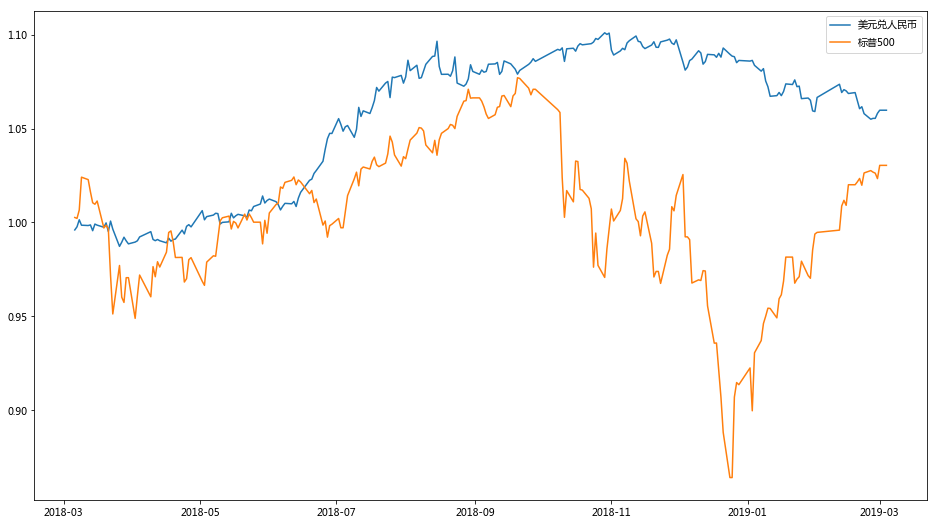

In [127]:
market_nav.plot(figsize=(16, 9))

In [128]:
data = w.edb(economic_variables, start_date, today)

In [129]:
economic_df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=[var2name[x] for x in economic_variables])

In [130]:
economic_df.head()

,10Y国债收益率,3M SHIBOR,AA级企业债收益率,股票波动率,10Y美债收益率,A股市盈率
2018-03-05,3.8453,4.7220,5.9812,27.96,2.88,18.27
2018-03-06,3.8253,4.7332,5.9848,27.63,2.88,18.47
2018-03-07,3.8203,4.7364,5.9746,27.92,2.89,18.37
2018-03-08,3.8203,4.7407,5.9772,27.24,2.86,18.46
2018-03-09,3.8278,4.7410,5.9773,24.69,2.90,18.57


In [131]:
economic_df[u'信用利差'] = economic_df[u'AA级企业债收益率'] - economic_df[u'10Y国债收益率']

In [132]:
del economic_df[u'AA级企业债收益率']

In [133]:
economic_nav = (1 + economic_df.pct_change()).cumprod().fillna(method='ffill')

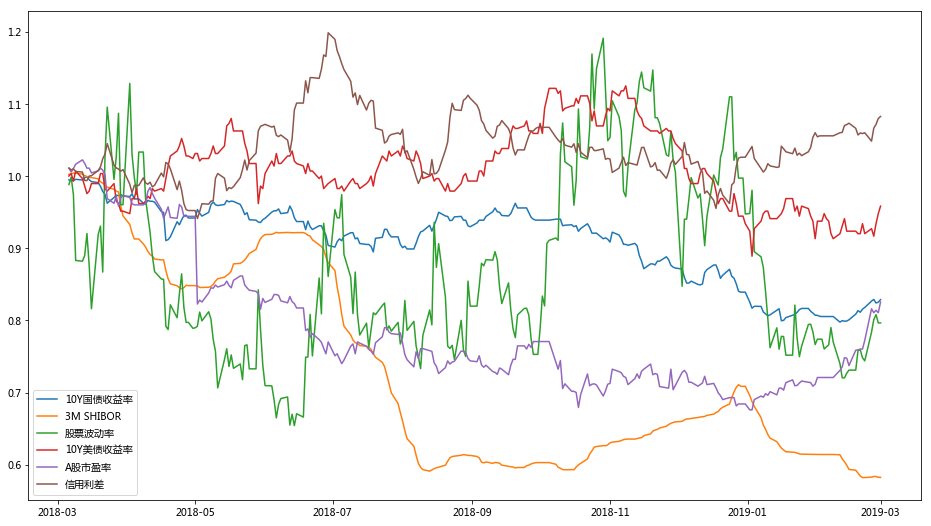

In [134]:
economic_nav.plot(figsize=(16, 9))

In [135]:
variable_df = market_nav.join(economic_nav)

In [136]:
variable_df.iloc[0] = 1

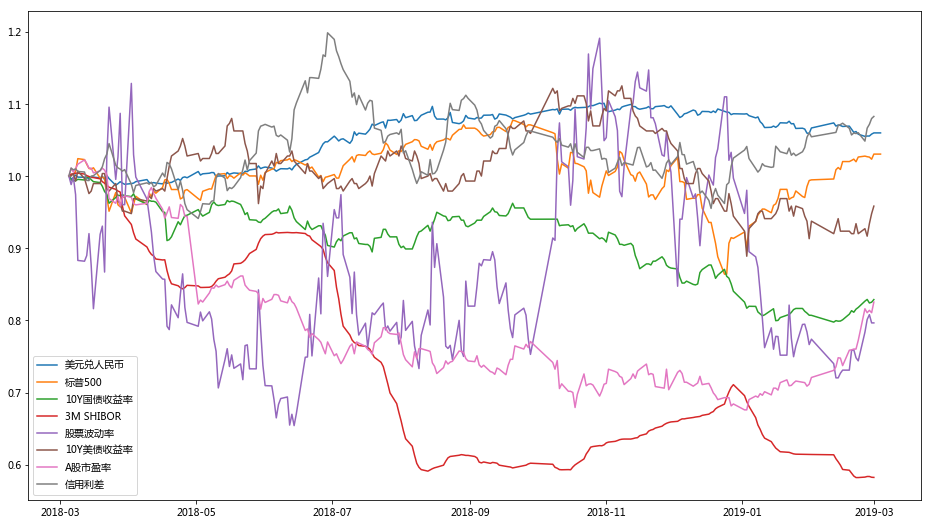

In [137]:
variable_df.plot(figsize=(16, 9))

In [138]:
variable_df.to_excel('../data/variables.xlsx')

## 初始化表格

In [139]:
ret_df = pd.DataFrame()

In [140]:
ret_df[u'成长股'] = price['000905.SH'].pct_change()
ret_df[u'价值股'] = price['000300.SH'].pct_change()
ret_df[u'港股'] = price['HSI.HI'].pct_change()
ret_df[u'黄金'] = price['AU9999.SGE'].pct_change()
ret_df[u'国债'] = price['CBA00602.CS'].pct_change()
ret_df[u'信用债'] = price['CBA02002.CS'].pct_change()

In [141]:
nav = (1 + ret_df).cumprod()

In [142]:
nav.iloc[0] = 1

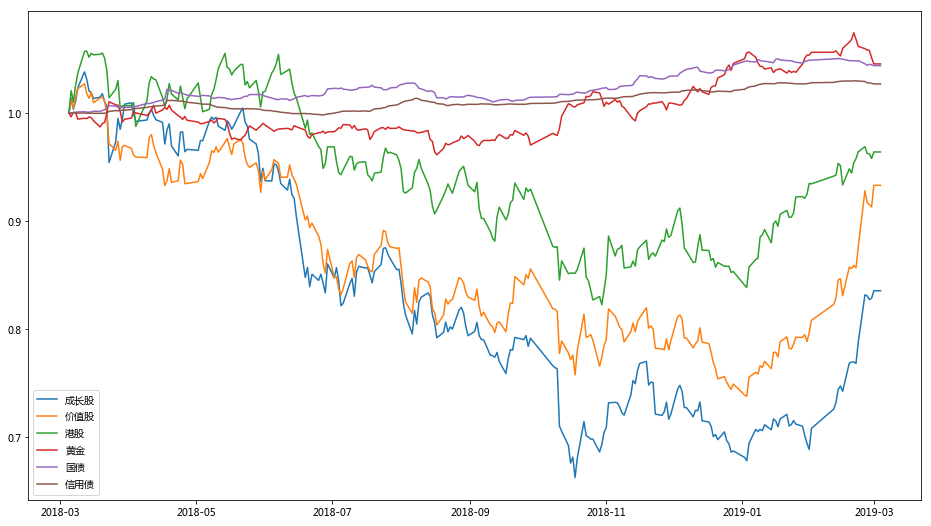

In [143]:
nav.plot(figsize=(16, 9))

In [144]:
nav.to_excel(u'../data/nav.xlsx')

## 生成EWMA相关性矩阵

In [145]:
cor_df = pd.DataFrame(index= ret_df.columns, 
                      columns=market_df.columns.tolist() + economic_df.columns.tolist())

In [146]:
for asset in cor_df.index:
    for var in cor_df.columns:
        if var in market_df.columns:
            s, t = (1+ret_df[asset]).cumprod(), (1+market_df[var].pct_change()).cumprod()
            corr = s.ewm(alpha=0.02, ignore_na=True, adjust=True).corr(t)
            cor_df.loc[asset, var] = corr[-1]
        elif var in economic_df.columns:
            s, t = (1+ret_df[asset]).cumprod(), (1+economic_df[var].pct_change()).cumprod()
            corr = s.ewm(alpha=0.02, ignore_na=True, adjust=True).corr(t)
            cor_df.loc[asset, var] = corr[-1]

In [147]:
cor_df

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
成长股,-0.682764,0.567861,0.344509,0.293842,-0.302068,0.0229404,0.921713,0.394559
价值股,-0.70233,0.64616,0.0834592,0.00189651,-0.430106,-0.124098,0.961721,0.532638
港股,-0.852136,0.574299,-0.152249,0.0121381,-0.744246,-0.381979,0.816691,0.579899
黄金,-0.284107,-0.260399,-0.900266,-0.377868,-0.399599,-0.775018,0.000785057,0.10714
国债,-0.162473,-0.369737,-0.989788,-0.349742,-0.407054,-0.78936,-0.190833,0.0107064
信用债,-0.156905,-0.202749,-0.953482,-0.548928,-0.417551,-0.720612,-0.10171,0.0236926


In [148]:
cor_df.to_excel(u'../data/ewma_cor.xlsx')

In [149]:
# cor_df[cor_df.abs() < 0.1] = 0

In [150]:
cor_df

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
成长股,-0.682764,0.567861,0.344509,0.293842,-0.302068,0.0229404,0.921713,0.394559
价值股,-0.70233,0.64616,0.0834592,0.00189651,-0.430106,-0.124098,0.961721,0.532638
港股,-0.852136,0.574299,-0.152249,0.0121381,-0.744246,-0.381979,0.816691,0.579899
黄金,-0.284107,-0.260399,-0.900266,-0.377868,-0.399599,-0.775018,0.000785057,0.10714
国债,-0.162473,-0.369737,-0.989788,-0.349742,-0.407054,-0.78936,-0.190833,0.0107064
信用债,-0.156905,-0.202749,-0.953482,-0.548928,-0.417551,-0.720612,-0.10171,0.0236926


## 计算变量的trend

In [151]:
trend = {}
for var in cor_df.columns:
    if var in market_df.columns:
        t = market_df[var]
    elif var in economic_df.columns:
        t = economic_df[var]
    ret = t.pct_change()[-60:]
    up, down = ret[ret > 0].sum(), -ret[ret < 0].sum()
    if up > down:
        trend[var] = up / down
    else:
        trend[var] = -down / up

In [152]:
for k, v in trend.iteritems():
    print k, v

标普500 1.1197160748343815
股票波动率 -1.1985532967289447
3M SHIBOR -2.9702152669964
美元兑人民币 -1.5616088070661374
信用利差 1.4527405226582573
10Y国债收益率 -1.1885150850314155
A股市盈率 2.0815491112180573
10Y美债收益率 -1.1638973294336072


# 综合得到Score Board

In [153]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [154]:
board = pd.DataFrame(index=cor_df.index, columns=cor_df.columns)
for var in cor_df.columns:
    x = cor_df[var] * trend[var]
    board[var] = sigmoid(x.astype(np.float32))

In [155]:
trend_df = pd.DataFrame(trend, index=[u'变量趋势'])

In [156]:
board = trend_df.append(board)

In [157]:
board = board[cor_df.columns]

In [158]:
board

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
变量趋势,-1.561609,1.119716,-1.188515,-2.970215,-1.198553,-1.163897,2.081549,1.452741
成长股,0.743876,0.653813,0.399043,0.294677,0.589535,0.493325,0.871981,0.639499
价值股,0.749653,0.673381,0.475222,0.498592,0.626096,0.536047,0.880993,0.684339
港股,0.790957,0.655443,0.545115,0.490988,0.709307,0.609351,0.845533,0.698979
黄金,0.609132,0.427619,0.744593,0.754424,0.617498,0.711369,0.500409,0.538833
国债,0.563092,0.397953,0.764296,0.738620,0.619606,0.714784,0.401978,0.503888
信用债,0.560952,0.443487,0.756434,0.836229,0.622567,0.698195,0.447268,0.508604


In [159]:
board.to_excel(u'../data/dashboard.xlsx')